In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [46]:
with open('results_qlearning.pkl', 'rb') as f:
    res_qlearning = pickle.load(f)

In [49]:
def process_data(data, keys):
    res = {}
    for key in keys:
        iteration_episode_steps = []
        episode_steps = []
        for id in range(len(data)):
            iteration_episode_steps, temp = zip(*data[id][key])
            episode_steps.append(temp)
        episode_steps = np.array(episode_steps)
        
        res[key] = (iteration_episode_steps, episode_steps)
    return 

def compute_confidence(x, axis=0):
    z = np.array(x)
    mu = z.mean(axis)
    std = z.std(axis)
    N = z.shape[0]
    c = 1.96 * std / np.sqrt(N)
    return mu, mu - c, mu + c
        
        

[300.  300.  295.5 300.  286.4 300.  300.  290.1 300.  300.  300.  274.
 294.6 288.  277.6 250.8 193.1 247.4 233.2 121.8  72.   98.4  93.9  82.6
 105.8  86.1  94.1  70.9 105.6 110.6 150.7  90.5 105.2  95.8  91.8  65.
 121.6  78.5  58.   43.1  49.6  45.3  58.5  53.3  82.2  43.7  44.7  48.7
  48.4  50.   45.   46.4  49.   46.1  47.   47.   47.5  46.6  46.6  41.4
  42.4  47.6  45.6  45.6  45.1  43.7  47.3]
[288.7 300.  300.  294.7 300.  300.  288.5 290.1 284.1 285.8 290.2 257.
 270.7 295.8 232.9 242.1 277.5 221.9 183.4 122.4 170.3  83.5  74.9  79.9
  75.5  88.9  78.7  92.8  87.1  91.3  50.3  72.7  63.6  70.3  57.3  61.
  49.6  59.4  58.6  44.4  41.7  45.1  43.4  45.1  48.4  59.8  44.   42.4
  42.6  40.   43.4  42.1  44.5  41.2  39.5  44.1  41.6  41.7  41.9  44.2
  46.5  45.8  46.5  41.6  44.5  41.3  41.9]


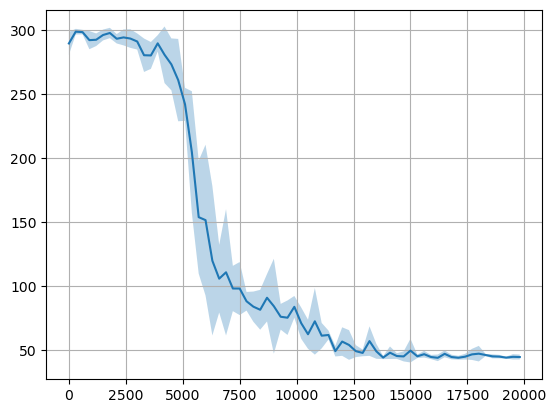

In [51]:
ep_steps = process_data(res_qlearning)

print(ep_steps[1][0])
print(ep_steps[1][1])
mu, lb, ub = compute_confidence(ep_steps[1])

plt.plot(ep_steps[0], mu)
plt.fill_between(ep_steps[0], lb, ub, alpha=0.3)
plt.grid()
plt.show()

(5, 67)